### <font color='#cb4154'> CS6375: Machine Learning (Spring '19) </font>
_**Instructor**: Gautam Kunapuli_ <br>
_**Due**: In class, **February 27 (Wednesday)**_

---

# **_Homework 2_**

The report component of this assignment is the **hard copy** of this homework, along with your answers to questions, and is **due at the start of class on <font color='#cb4154'>Wednesday, February 27, 2019</font>**.

The **electronic version** of this homework **must be uploaded on eLearning by <font color='#cb4154'>12:59pm Central Standard Time, Wednesday, February 27, 2019</font>**. All deadlines are hard and without exceptions unless permission was obtained from the instructor **in advance**. 

You may work in groups to discuss the problems and work through solutions together. However, you must **write up your solutions on your own**, without copying another student's work or letting another student copy your work. In your solution for each problem, you must write down the names of your partner (if any); this will not affect your grade. 

---

# 1. <font color='#cb4154'> **Support Vector Machines with Synthetic Data**</font>, 50 points. 

For this problem, we will generate synthetic data for a nonlinear binary classification problem and partition it into training, validation and test sets. Our goal is to understand the behavior of SVMs with Radial-Basis Function (RBF) kernels with different values of $C$ and $\gamma$.

In [62]:
#
# DO NOT EDIT THIS FUNCTION; IF YOU WANT TO PLAY AROUND WITH DATA GENERATION, 
# MAKE A COPY OF THIS FUNCTION AND THEN EDIT
#
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


def generate_data(n_samples, tst_frac=0.2, val_frac=0.2):
  # Generate a non-linear data set
  X, y = make_moons(n_samples=n_samples, noise=0.25, random_state=30)
   
  # Take a small subset of the data and make it VERY noisy; that is, generate outliers
  m = 30
  np.random.seed(42)
  ind = np.random.permutation(n_samples)[:m]
  X[ind, :] += np.random.multivariate_normal([0, 0], np.eye(2), (m, ))
  y[ind] = 1 - y[ind]

  # Plot this data
  cmap = ListedColormap(['#b30065', '#178000'])
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolors='k')       
  
  # First, we use train_test_split to partition (X, y) into training and test sets
  X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size=tst_frac, 
                                                random_state=42)

  # Next, we use train_test_split to further partition (X_trn, y_trn) into training and validation sets
  X_trn, X_val, y_trn, y_val = train_test_split(X_trn, y_trn, test_size=val_frac, 
                                                random_state=42)
  
  return (X_trn, y_trn), (X_val, y_val), (X_tst, y_tst)

In [63]:
#
#  DO NOT EDIT THIS FUNCTION; IF YOU WANT TO PLAY AROUND WITH VISUALIZATION, 
#  MAKE A COPY OF THIS FUNCTION AND THEN EDIT 
#

def visualize(models, param, X, y):
  # Initialize plotting
  if len(models) % 3 == 0:
    nrows = len(models) // 3
  else:
    nrows = len(models) // 3 + 1
    
  fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(15, 5.0 * nrows))
  cmap = ListedColormap(['#b30065', '#178000'])

  # Create a mesh
  xMin, xMax = X[:, 0].min() - 1, X[:, 0].max() + 1
  yMin, yMax = X[:, 1].min() - 1, X[:, 1].max() + 1
  xMesh, yMesh = np.meshgrid(np.arange(xMin, xMax, 0.01), 
                             np.arange(yMin, yMax, 0.01))

  for i, (p, clf) in enumerate(models.items()):
    # if i > 0:
    #   break
    r, c = np.divmod(i, 3)
    ax = axes[r, c]

    # Plot contours
    zMesh = clf.decision_function(np.c_[xMesh.ravel(), yMesh.ravel()])
    zMesh = zMesh.reshape(xMesh.shape)
    ax.contourf(xMesh, yMesh, zMesh, cmap=plt.cm.PiYG, alpha=0.6)

    if (param == 'C' and p > 0.0) or (param == 'gamma'):
      ax.contour(xMesh, yMesh, zMesh, colors='k', levels=[-1, 0, 1], 
                 alpha=0.5, linestyles=['--', '-', '--'])

    # Plot data
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolors='k')       
    ax.set_title('{0} = {1}'.format(param, p))

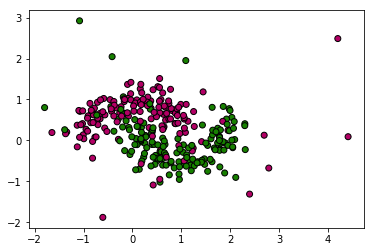

In [64]:
# Generate the data
n_samples = 300    # Total size of data set 
(X_trn, y_trn), (X_val, y_val), (X_tst, y_tst) = generate_data(n_samples)

---
### **a**. (25 points)  The effect of the regularization parameter, $C$
Complete the Python code snippet below that takes the generated synthetic 2-d data as input and learns non-linear SVMs. Use scikit-learn's [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) function to learn SVM models with **radial-basis kernels** for fixed $\gamma$ and various choices of $C \in \{10^{-3}, 10^{-2}\, \cdots, 1, \, \cdots\, 10^5\}$. The value of $\gamma$ is fixed to $\gamma = \frac{1}{d \cdot \sigma_X}$, where $d$ is the data dimension and $\sigma_X$ is the standard deviation of the data set $X$. SVC can automatically use these setting for $\gamma$ if you pass the argument gamma = 'scale' (see documentation for more details).

**Plot**: For each classifier, compute **both** the **training error** and the **validation error**. Plot them together, making sure to label the axes and each curve clearly.

**Discussion**: How do the training error and the validation error change with $C$? Based on the visualization of the models and their resulting classifiers, how does changing $C$ change the models? Explain in terms of minimizing the SVM's objective function $\frac{1}{2} \mathbf{w}^\prime \mathbf{w} \, + \, C \, \Sigma_{i=1}^n \, \ell(\mathbf{w} \mid \mathbf{x}_i, y_i)$, where $\ell$ is the hinge loss for each training example $(\mathbf{x}_i, y_i)$.

**Final Model Selection**: Use the validation set to select the best the classifier corresponding to the best value, $C_{best}$. Report the accuracy on the **test set** for this selected best SVM model. _Note: You should report a single number, your final test set accuracy on the model corresponding to $C_{best}$_.

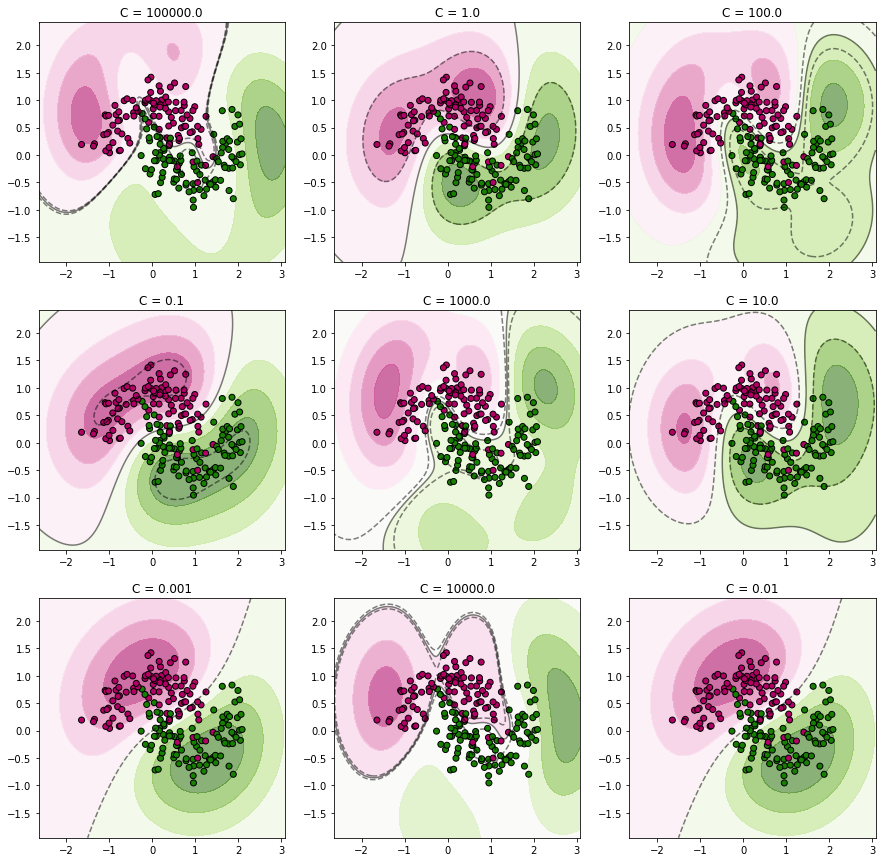

In [65]:
# Learn support vector classifiers with a radial-basis function kernel with 
# fixed gamma = 1 / (n_features * X.std()) and different values of C
from sklearn.svm import SVC
from sklearn.metrics import zero_one_loss
C_range = np.arange(-3.0, 6.0, 1.0)
C_values = np.power(10.0, C_range)

models = dict()
trnErr = dict()
valErr = dict()
tstErr={}
for C in C_values:
  #
  #
  # Insert your code here to learn SVM models
  #
    svc=SVC(C=C,gamma='scale',kernel='rbf')
    
    #print svc
    svc.fit(X_trn,y_trn)
    models[C]=svc
    y_trn_pred=svc.predict(X_trn)
    #print(y_trn,y_trn_pred)
    hl=zero_one_loss(y_trn,y_trn_pred)
    trnErr[C]=hl
    #print hl
    y_val_pred=svc.predict(X_val)
    valErr[C]=zero_one_loss(y_val,y_val_pred)
    y_tst_pred=svc.predict(X_tst)
    tstErr[C]=zero_one_loss(y_tst,y_tst_pred)
  #

    
  
visualize(models, 'C', X_trn, y_trn)





#
#
# Insert your code here to perform model selection
#
#

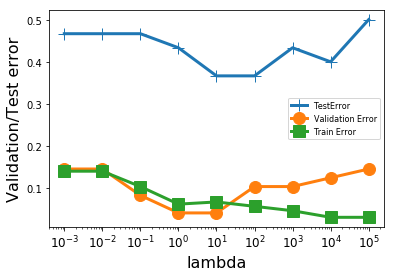

In [66]:
#plot
plt.figure()
ststerr1=sorted(tstErr.keys())
tst1=[]
for k in ststerr1:
    tst1.append(tstErr[k])
    
plt.plot(ststerr1,tst1,marker='+',linewidth=3,markersize=12)
svalerr1=sorted(valErr.keys())

valval1=[]
for k in svalerr1:
    valval1.append(valErr[k])
plt.plot(svalerr1, valval1, marker='o', linewidth=3, markersize=12)
svalerr=sorted(trnErr.keys())
valval=[]
for k in svalerr:
    valval.append(trnErr[k])
plt.plot(svalerr, valval, marker='s', linewidth=3, markersize=12)
plt.xlabel('lambda', fontsize=16)
plt.ylabel('Validation/Test error', fontsize=16)
plt.xticks(list(valErr.keys()), fontsize=12)

plt.legend(['TestError','Validation Error', 'Train Error'], fontsize=8)
plt.xscale('log')

In [67]:
#How do the training error and the validation error change with  𝐶
print "Both the error rates are very high for very low values of C.The training error decreases as C increases. The validation error decreases initially as C increases, but, after a point starts increasing again as C increases. Thus, optimal values are found in the middle"

Both the error rates are very high for very low values of C.The training error decreases as C increases. The validation error decreases initially as C increases, but, after a point starts increasing again as C increases. Thus, optimal values are found in the middle


In [68]:
#Based on the visualization of the models and their resulting classifiers, how does changing  𝐶 change the models?
print "Based on the visualization, increasing C causes the models to become more complex and fit more data(sometimes to the point of overfitting)"

Based on the visualization, increasing C causes the models to become more complex and fit more data(sometimes to the point of overfitting)


In [69]:
#Explain in terms of minimizing the SVM's objective function  12𝐰′𝐰+𝐶Σ𝑛𝑖=1ℓ(𝐰∣𝐱𝑖,𝑦𝑖)
print "C trades off between margin maximization and error minimization. Minimizing w'w is maximizing the margin. minimizing l is minimizing loss. SMall values of C give high error. As C increases, error decreases on the training set. But as error decreases, complexity increases. Hence, it tends to overfit for higher values of C. Which is why the error increases on the validation set for higher values for C as it does not generalize well. C is a regularization term"

C trades off between margin maximization and error minimization. Minimizing w'w is maximizing the margin. minimizing l is minimizing loss. SMall values of C give high error. As C increases, error decreases on the training set. But as error decreases, complexity increases. Hence, it tends to overfit for higher values of C. Which is why the error increases on the validation set for higher values for C as it does not generalize well. C is a regularization term


In [70]:
print "According to the validation errors, the validation error is lowest at C=1.0."

According to the validation errors, the validation error is lowest at C=1.0.


In [71]:
import sklearn
model=models[1.0]
y_test_pred=model.predict(X_tst)
print sklearn.metrics.accuracy_score(y_tst,y_test_pred)

0.5666666666666667


---
### **b**. (25 points)  The effect of the RBF kernel parameter, $\gamma$
Complete the Python code snippet below that takes the generated synthetic 2-d data as input and learns various non-linear SVMs. Use scikit-learn's [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) function to learn SVM models with **radial-basis kernels** for fixed $C$ and various choices of $\gamma \in \{10^{-2}, 10^{-1}\, 1, 10, \, 10^2 \, 10^3\}$. The value of $C$ is fixed to $C = 10$.

**Plot**: For each classifier, compute **both** the **training error** and the **validation error**. Plot them together, making sure to label the axes and each curve clearly.

**Discussion**: How do the training error and the validation error change with $\gamma$? Based on the visualization of the models and their resulting classifiers, how does changing $\gamma$ change the models? Explain in terms of the functional form of the RBF kernel, $\kappa(\mathbf{x}, \,\mathbf{z}) \, = \, \exp(-\gamma \cdot \|\mathbf{x} - \mathbf{z} \|^2)$

**Final Model Selection**: Use the validation set to select the best the classifier corresponding to the best value, $\gamma_{best}$. Report the accuracy on the **test set** for this selected best SVM model. _Note: You should report a single number, your final test set accuracy on the model corresponding to $\gamma_{best}$_.

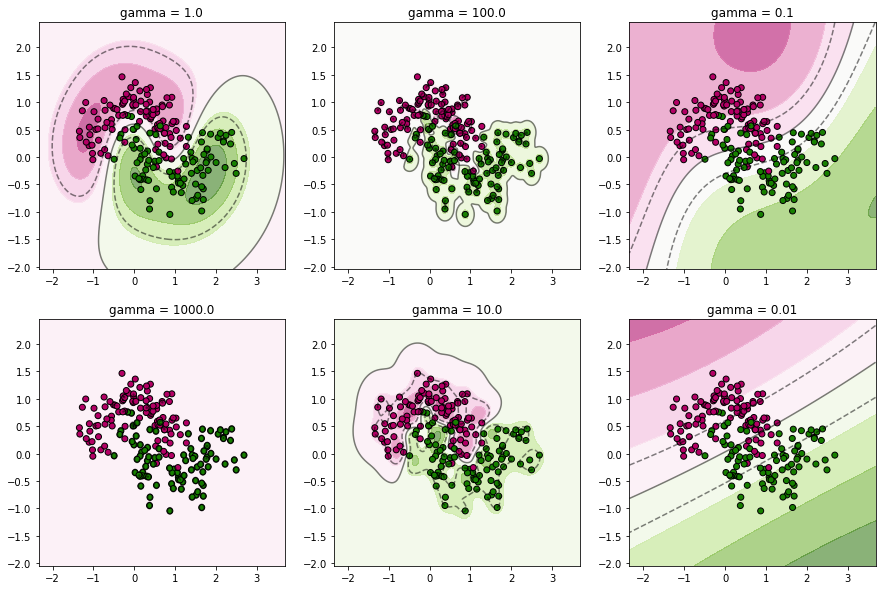

In [60]:
# Learn support vector classifiers with a radial-basis function kernel with 
# fixed C = 10.0 and different values of gamma
gamma_range = np.arange(-2.0, 4.0, 1.0)
gamma_values = np.power(10.0, gamma_range)

models = dict()
trnErr = dict()
valErr = dict()
tstErr={}
for G in gamma_values:
    svc=SVC(C=10,gamma=G,kernel='rbf')
    
    #print svc
    svc.fit(X_trn,y_trn)
    models[G]=svc
    y_trn_pred=svc.predict(X_trn)
    #print(y_trn,y_trn_pred)
    hl=hinge_loss(y_trn,y_trn_pred)
    trnErr[G]=hl
    #print hl
    y_val_pred=svc.predict(X_val)
    valErr[G]=hinge_loss(y_val,y_val_pred)
    y_tst_pred=svc.predict(X_tst)
    tstErr[G]=hinge_loss(y_tst,y_tst_pred)
    
  #
  #
  # Insert your code here to learn SVM models
  #
  #
  
visualize(models, 'gamma', X_trn, y_trn)

#
#
# Insert your code here to perform model selection
#
#

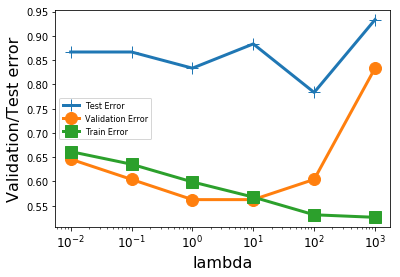

In [61]:
#plot
plt.figure()
ststerr1=sorted(tstErr.keys())
tst1=[]
for k in ststerr1:
    tst1.append(tstErr[k])
    
plt.plot(ststerr1,tst1,marker='+',linewidth=3,markersize=12)
svalerr1=sorted(valErr.keys())
valval1=[]
for k in svalerr1:
    valval1.append(valErr[k])
plt.plot(svalerr1, valval1, marker='o', linewidth=3, markersize=12)
svalerr=sorted(trnErr.keys())
valval=[]
for k in svalerr:
    valval.append(trnErr[k])
plt.plot(svalerr, valval, marker='s', linewidth=3, markersize=12)
plt.xlabel('lambda', fontsize=16)
plt.ylabel('Validation/Test error', fontsize=16)
plt.xticks(list(valErr.keys()), fontsize=12)

plt.legend(['Test Error','Validation Error', 'Train Error'], fontsize=8)
plt.xscale('log')

In [36]:
valErr

{0.01: 0.6458333333333334,
 0.1: 0.6041666666666666,
 1.0: 0.5625,
 10.0: 0.5625,
 100.0: 0.6041666666666666,
 1000.0: 0.8333333333333334}

In [37]:
print "As gamma increases, the training error decreases. However, the validation error, is high for lower values of gamma and decreases as we increase gamma, but after decreasing, increases agin as we increase gamma. This is because our model starts overfitting at high gamma values"

As gamma increases, the training error decreases. However, the validation error, is high for lower values of gamma and decreases as we increase gamma, but after decreasing, increases agin as we increase gamma. This is because our model starts overfitting at high gamma values


In [38]:
print "AS we increase gamma, the model fits more and more points and model becomes more complex"

AS we increase gamma, the model fits more and more points and model becomes more complex


In [39]:
print "Gamma intuitively defines how far the influence of a single training example reaches. gamma is multiplied by pairwise difference between points. That means, when gamma is low, the distance becomes less important. Thus, more distance from the model is accepted. As gamma increases, the model curves more and more to accomodate more data points. Very high values of gamma can cause overfitting"

Gamma intuitively defines how far the influence of a single training example reaches. gamma is multiplied by pairwise difference between points. That means, when gamma is low, the distance becomes less important. Thus, more distance from the model is accepted. As gamma increases, the model curves more and more to accomodate more data points. Very high values of gamma can cause overfitting


In [40]:
print "Best model is obtained at gamma=10 based on the validation set and the training error vs validation error plot"

Best model is obtained at gamma=10 based on the validation set and the training error vs validation error plot


In [41]:
y_test_pred=models[1].predict(X_tst)
print "test set accuracy",sklearn.metrics.accuracy_score(y_tst,y_test_pred)


test set accuracy 0.6666666666666666


---
# 2. <font color='#cb4154'> **Breast Cancer Diagnosis with Support Vector Machines**</font>, 25 points. 

For this problem, we will use the [Wisconsin Breast Cancer](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)) data set, which has already been pre-processed and partitioned into training, validation and test sets. Numpy's [loadtxt](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.loadtxt.html) command can be used to load CSV files.

In [42]:
# Load the Breast Cancer Diagnosis data set; download the files from eLearning
# CSV files can be read easily using np.loadtxt()
#
# Insert your code here.
#
import pandas as pd
data=pd.read_csv('wdbc_trn.csv')
xtrn=data.iloc[:,1:].values
ytrn=data.iloc[:,0].values
valdata=pd.read_csv('wdbc_val.csv')
xval=valdata.iloc[:,1:].values
yval=valdata.iloc[:,0].values
tstdata=pd.read_csv('wdbc_tst.csv')
xtst=tstdata.iloc[:,1:].values
ytst=tstdata.iloc[:,0].values

Use scikit-learn's [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) function to learn SVM models with **radial-basis kernels** for **each combination** of $C \in \{10^{-2}, 10^{-1}, 1, 10^1, \, \cdots\, 10^4\}$ and $\gamma \in \{10^{-3}, 10^{-2}\, 10^{-1}, 1, \, 10, \, 10^2\}$. Print the tables corresponding to the training and validation errors.

**Final Model Selection**: Use the validation set to select the best the classifier corresponding to the best parameter values, $C_{best}$ and $\gamma_{best}$. Report the accuracy on the **test set** for this selected best SVM model. _Note: You should report a single number, your final test set accuracy on the model corresponding to $C_{best}$ and $\gamma_{best}$_.

In [43]:
#
#
# Insert your code here to perform model selection
#
#
m={}
verr={}
terr={}
from sklearn.svm import SVC

print "c=\t10**-2\t10**-1\t10**0\t10**1\t10**2\t10**3\t10**4\n"
g=-3
print "g"
for c in range(-2,5):
    print "\n|10**",str(g)+"|",
    for g in range(-3,3):
     
            
            svm=SVC(C=10**c,gamma=10**g,kernel='rbf')
            svm.fit(xtrn,ytrn)
            m[(c,g)]=svm
            ytrnpred=svm.predict(xtrn)
            terr[(c,g)]=sklearn.metrics.accuracy_score(ytrn,ytrnpred)
         
            yvalpred=svm.predict(xval)
            verr[(c,g)]= sklearn.metrics.accuracy_score(yval,yvalpred)
            print "\t|"+str(round(terr[(c,g)],2))+","+str(round(verr[(c,g)],2))+"|",
            #print str(10**c)+",\t\t"+str(10**g)+",\t\t"+str(round(terr[(c,g)],2))+",\t\t"+str(round(verr[(c,g)],2))+"\t\n"

c=	10**-2	10**-1	10**0	10**1	10**2	10**3	10**4

g

|10** -3| 	|0.63,0.63| 	|0.63,0.63| 	|0.63,0.63| 	|0.63,0.63| 	|0.63,0.63| 	|0.63,0.63| 
|10** 2| 	|0.7,0.69| 	|0.95,0.93| 	|0.96,0.92| 	|0.63,0.63| 	|0.63,0.63| 	|0.63,0.63| 
|10** 2| 	|0.95,0.94| 	|0.97,0.94| 	|0.99,0.96| 	|1.0,0.63| 	|1.0,0.63| 	|1.0,0.63| 
|10** 2| 	|0.97,0.96| 	|0.99,0.96| 	|1.0,0.96| 	|1.0,0.63| 	|1.0,0.63| 	|1.0,0.63| 
|10** 2| 	|0.99,0.96| 	|1.0,0.97| 	|1.0,0.96| 	|1.0,0.63| 	|1.0,0.63| 	|1.0,0.63| 
|10** 2| 	|0.99,0.96| 	|1.0,0.97| 	|1.0,0.96| 	|1.0,0.63| 	|1.0,0.63| 	|1.0,0.63| 
|10** 2| 	|1.0,0.97| 	|1.0,0.97| 	|1.0,0.96| 	|1.0,0.63| 	|1.0,0.63| 	|1.0,0.63|


In [44]:
m1={}
x=max(verr.values())
for key in verr:
    if verr[key]==x:
        print "10**",key
        m1[key]=m[key]
        
print"these are the best models"

10** (4, -3)
10** (2, -2)
10** (4, -2)
10** (3, -2)
these are the best models


In [45]:
for md in m1:
    y_test_pred=m1[md].predict(xtst)
   
    print sklearn.metrics.accuracy_score(ytst,y_test_pred)

0.9385964912280702
0.9649122807017544
0.9473684210526315
0.9473684210526315


In [46]:
print"Thus, the best model is (10**2,10**-2)=>(c=100,gamma=0.01) with accuracy 96.49"

Thus, the best model is (10**2,10**-2)=>(c=100,gamma=0.01) with accuracy 96.49


---
# 3. <font color='#cb4154'> **Decision Trees**</font>, 25 points. 

### a. (12 points)  Interpreting a Decision Tree (Pencil and Paper)

Consider the decision boundary in the figure below and draw the equivalent decision tree. Red circles are Class +1 and blue squares, Class -1.

![If the figure is not visible, make sure you have placed the file HW02_DecisionTrees_3a.png in the same directory as this Python notebook.](./HW02_DecisionTrees_3a.png)

---

### b. (13 points)  Visualizing a Decision Tree (Pencil and Paper)

Consider the decision tree in the figure below and draw the equivalent decision boundary. Make sure to label each decision region with the corresponding leaf node from the decision tree.

![If the figure is not visible, make sure you have placed the file HW02_DecisionTrees_3b.png in the same directory as this Python notebook.](./HW02_DecisionTrees_3b.png)

---